# CNN

In [1]:
import torch 
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import torch.nn as nn
from PIL import Image

## Defining function & loading model(invert)

In [2]:
IMAGE_SIZE = 28
composed = transforms.Compose([transforms.Grayscale(num_output_channels=1), \
                               transforms.Resize((IMAGE_SIZE, IMAGE_SIZE), interpolation = 2), \
                               transforms.ToTensor(),])

In [3]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible')
else:
  device = torch.device('cpu')
  print('Training in CPU')

Training in CPU


In [4]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=64, out_2=128):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 7 * 7, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [5]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

In [6]:
model = CNN(out_1=64, out_2=128)

In [7]:
model.load_state_dict(torch.load('invert_color.pt', map_location=device))
model

CNN(
  (cnn1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=10, bias=True)
)

## display pics

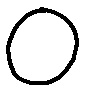

In [8]:
image = Image.open(r"D:\user\Documents\N26091194_TENG\Projects\MNIST\pics\0.jpg")#<-----change your pics path
image

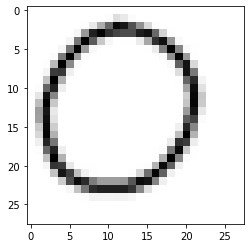

In [9]:
X = composed(image)
X = X[None, :, :]
show_data(X)

## Predict

In [10]:
model.eval()
z = model(X)
z = nn.functional.softmax(z, dim=1)
output = z.tolist()[0]
output_copy = output.copy()

for index, value in enumerate(output):
    print('推測 '+str(index)+' 的機率: {:.3}'.format(value))
print('-'*40)

print('預測結果 1st :', output.index(max(output_copy)))
output_copy.remove(max(output_copy))

print('預測結果 2nd :', output.index(max(output_copy)))
output_copy.remove(max(output_copy))

print('預測結果 3rd :', output.index(max(output_copy)))
output_copy.remove(max(output_copy))

print('-'*40)
print('預測為 :',output.index(max(output)))

推測 0 的機率: 0.34
推測 1 的機率: 4.47e-05
推測 2 的機率: 0.632
推測 3 的機率: 0.0263
推測 4 的機率: 1.89e-08
推測 5 的機率: 4.79e-05
推測 6 的機率: 2.18e-05
推測 7 的機率: 0.000127
推測 8 的機率: 2.35e-06
推測 9 的機率: 0.00187
----------------------------------------
預測結果 1st : 2
預測結果 2nd : 0
預測結果 3rd : 3
----------------------------------------
預測為 : 2


In [11]:
# error in black : 4
# error in white : 0, 6, 7, 9

# ResNet

## loading model

In [12]:
from torchvision.models.resnet import ResNet, BasicBlock, Bottleneck

class MNISTResNet(ResNet):
    def __init__(self):
        super(MNISTResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10) # Based on ResNet18
        # super(MNISTResNet, self).__init__(BasicBlock, [3, 4, 6, 3], num_classes=10) # Based on ResNet34
        # super(MNISTResNet, self).__init__(Bottleneck, [3, 4, 6, 3], num_classes=10) # Based on ResNet50
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=1, padding=3,bias=False)

model = MNISTResNet()

In [13]:
model.load_state_dict(torch.load('ResNet', map_location=device))
model

MNISTResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=Tru

## disply pic

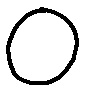

In [17]:
image = Image.open(r"D:\user\Documents\N26091194_TENG\Projects\MNIST\pics\0.jpg") #<-----change your pics path
image

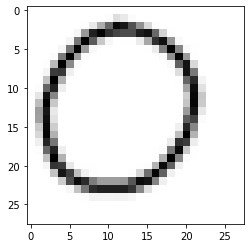

In [18]:
X = composed(image)
X = X[None, :, :]
show_data(X)

## Predict

In [19]:
model.eval()
z = model(X)
z = nn.functional.softmax(z, dim=1)
output = z.tolist()[0]
output_copy = output.copy()

for index, value in enumerate(output):
    print('推測 '+str(index)+' 的機率: {:.3}'.format(value))
print('-'*40)

print('預測結果 1st :', output.index(max(output_copy)))
output_copy.remove(max(output_copy))

print('預測結果 2nd :', output.index(max(output_copy)))
output_copy.remove(max(output_copy))

print('預測結果 3rd :', output.index(max(output_copy)))
output_copy.remove(max(output_copy))

print('-'*40)
print('預測為 :',output.index(max(output)))

推測 0 的機率: 1.0
推測 1 的機率: 1.03e-07
推測 2 的機率: 3.62e-05
推測 3 的機率: 1.71e-06
推測 4 的機率: 6.63e-07
推測 5 的機率: 7e-07
推測 6 的機率: 3.6e-06
推測 7 的機率: 2.79e-06
推測 8 的機率: 9.2e-07
推測 9 的機率: 5.79e-06
----------------------------------------
預測結果 1st : 0
預測結果 2nd : 2
預測結果 3rd : 9
----------------------------------------
預測為 : 0
